In [1]:
# Importing Necessary Library
import pandas as pd

In [2]:
# Load the Dataset
movie_info = pd.read_csv('Movie Interests.csv')

In [3]:
movie_info.head()

,Age,Gender,Interest
0,8,Male,Animation
1,11,Male,Animation
2,12,Male,Animation
3,16,Male,Action
4,18,Male,Action


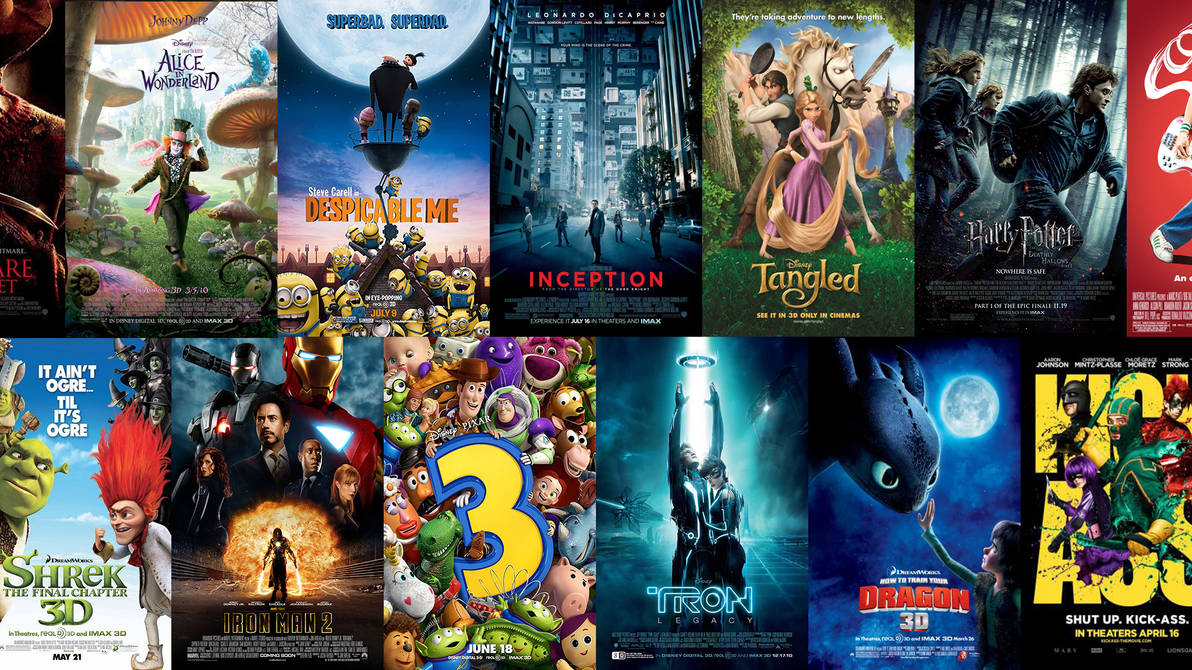

In [4]:
from IPython.display import Image

# Display the image
Image(filename = r"C:\Users\valmi\Downloads\movies_turning_10__2010_posters_by_thekingblader995_ddy8ltq-pre.jpg")

### About Dataset

This dataset contains information about movie interests based on age and gender. It can be used for analyzing movie preferences among
different demographics. The columns in the dataset are as follows:

1. Age - Age of the individual.
2. Gender - Gender of the individual (Male/Female).
3. Interest - Movie genre preference (e.g., Animation, Action).

# Exploratory data analysis (EDA)

# 1. Changing the Columns name to lower case 

In [4]:
# In Pyrhon .lower() is a built-in string method used to convert all upercase characters in a string to lowercase
movie_info.columns = [cols.lower() for cols in movie_info.columns]

In [5]:
movie_info.head()

,age,gender,interest
0,8,Male,Animation
1,11,Male,Animation
2,12,Male,Animation
3,16,Male,Action
4,18,Male,Action


# 1.1 Checking the shape of the dataset

In [6]:
# The .shape method provides information about the number of rows and columns in a DataFrame quickly and easily.
movie_info.shape

(18, 3)

# 1.2 Checking any null values in the dataset

In [7]:
# In Python's Pandas library, isnull.sum() is a function that counts number of missing values in the dataset.
movie_info.isnull().sum()

age         0
gender      0
interest    0
dtype: int64

# 1.3 Checking the Summary Information about the dataset

In [8]:
# In Python's Pandas library, the info() method is used to get a summary of a database in the pandas library, number of columns, column data types, memory usage
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       18 non-null     int64 
 1   gender    18 non-null     object
 2   interest  18 non-null     object
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


# 1.4 Checking the Statistical Information about the dataset

In [9]:
# In pandas, df.describe() is a method that provides descriptive statistics about the numerical columns in a DataFrame.
movie_info.describe()

,age
count,18.000000
mean,20.500000
std,9.444887
min,7.000000
25%,11.250000
50%,21.000000
75%,27.000000
max,35.000000


## Replacing Categorical Variable to numerical Variable

In [10]:
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
movie_info.replace({'gender': {'Male' : 1, 'Female' : 2}}, inplace = True)

In [12]:
movie_info.head()

,age,gender,interest
0,8,1,Animation
1,11,1,Animation
2,12,1,Animation
3,16,1,Action
4,18,1,Action


# Dividing Input and Output Dataset

In [13]:
input_dataset = movie_info.drop(columns = ['interest'])

In [14]:
input_dataset.head()

,age,gender
0,8,1
1,11,1
2,12,1
3,16,1
4,18,1


In [15]:
output_dataset = movie_info['interest']

In [16]:
output_dataset.head()

0    Animation
1    Animation
2    Animation
3       Action
4       Action
Name: interest, dtype: object

# train_test_split

In [17]:
from sklearn.model_selection import train_test_split

#splitting dataset input and output dataset for training
input_dataset_train, input_dataset_test, output_dataset_train, output_dataset_test = train_test_split (
    input_dataset, output_dataset, test_size = 0.2, random_state = 42
)

# Model Building

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Initializing the model
model = DecisionTreeClassifier()

# Training the model with input and output dataset
model.fit(input_dataset_train, output_dataset_train)

DecisionTreeClassifier()

# Prediction

In [19]:
movie_interest = model.predict(input_dataset_test)
movie_interest

array(['Animation', 'Animation', 'Drama', 'Action'], dtype=object)

# Accuracy

In [20]:
from sklearn.metrics import accuracy_score

# Checking the accuracy score 
accuracy = accuracy_score(output_dataset_test, movie_interest)

# print the result
print('Accurary:',accuracy)

Accurary: 1.0


# Machine learning persistence

Model persistence, also known as model serialization or model checkpointing, refers to the ability of a machine learning model to save its trained state and reload it later for further use.

# Job library

In machine learning, "joblib" is a Python library primarily used to efficiently save and load machine learning models, as well as enable parallel processing (multiprocessing) to accelerate computationally intensive tasks like model training across multiple cores or machines, essentially allowing for faster execution by utilizing distributed computing resources. 

# Saving the trained model

In [22]:
# Importing joblib library to save the trained model
import joblib

# Save the trained model
joblib.dump(model, 'Movie-Interest-Identifier.pkl')

['Movie-Interest-Identifier.pkl']

# Checking how our trained model is predicting

In [23]:
# Load the saved model
trained_movie_interest_model = joblib.load('Movie-Interest-Identifier.pkl')

# Checking how our trained model predicting
predictions = trained_movie_interest_model.predict([[9,1], [33, 2]])

# Print the predictions
print('Precitions:', predictions)

Precitions: ['Animation' 'Drama']
